In [342]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import pickle
from imblearn.over_sampling import SMOTE
0.
import warnings
warnings.filterwarnings('ignore')

In [343]:
data=pd.read_csv('cause_of_deaths dataset.csv')
data.sample(5)

,Country/Territory,Code,Year,Meningitis,Alzheimer's Disease and Other Dementias,Parkinson's Disease,Nutritional Deficiencies,Malaria,Drowning,Interpersonal Violence,...,Diabetes Mellitus,Chronic Kidney Disease,Poisonings,Protein-Energy Malnutrition,Road Injuries,Chronic Respiratory Diseases,Cirrhosis and Other Chronic Liver Diseases,Digestive Diseases,"Fire, Heat, and Hot Substances",Acute Hepatitis
5756,Ukraine,UKR,2016,481,15702,3496,143,0,3624,4937,...,2704,2714,1507,68,7651,11030,21131,31487,2222,75
4081,Pakistan,PAK,2008,25164,7994,3150,13845,3163,3254,13418,...,31519,32623,2412,8699,15446,76380,36354,52532,2549,8730
5030,South Africa,ZAF,2010,3011,5208,1160,2385,45,1697,21536,...,25559,10984,566,2319,21011,19667,6505,14325,2311,145
3186,Malaysia,MYS,2016,279,3134,840,211,3,753,612,...,3051,5225,191,204,7075,6259,4240,8807,285,190
4095,Pakistan,PAK,1998,28291,7372,2709,15343,11825,4958,10161,...,19463,22061,2252,10300,11740,75250,30648,46129,2484,10887


this is the data set of cause of death

In [344]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6120 entries, 0 to 6119
Data columns (total 34 columns):
 #   Column                                      Non-Null Count  Dtype 
---  ------                                      --------------  ----- 
 0   Country/Territory                           6120 non-null   object
 1   Code                                        6120 non-null   object
 2   Year                                        6120 non-null   int64 
 3   Meningitis                                  6120 non-null   int64 
 4   Alzheimer's Disease and Other Dementias     6120 non-null   int64 
 5   Parkinson's Disease                         6120 non-null   int64 
 6   Nutritional Deficiencies                    6120 non-null   int64 
 7   Malaria                                     6120 non-null   int64 
 8   Drowning                                    6120 non-null   int64 
 9   Interpersonal Violence                      6120 non-null   int64 
 10  Maternal Disorders      

In [345]:
data.isnull().sum()

Country/Territory                             0
Code                                          0
Year                                          0
Meningitis                                    0
Alzheimer's Disease and Other Dementias       0
Parkinson's Disease                           0
Nutritional Deficiencies                      0
Malaria                                       0
Drowning                                      0
Interpersonal Violence                        0
Maternal Disorders                            0
HIV/AIDS                                      0
Drug Use Disorders                            0
Tuberculosis                                  0
Cardiovascular Diseases                       0
Lower Respiratory Infections                  0
Neonatal Disorders                            0
Alcohol Use Disorders                         0
Self-harm                                     0
Exposure to Forces of Nature                  0
Diarrheal Diseases                      

no null values present in data

In [346]:
data.dtypes

Country/Territory                             object
Code                                          object
Year                                           int64
Meningitis                                     int64
Alzheimer's Disease and Other Dementias        int64
Parkinson's Disease                            int64
Nutritional Deficiencies                       int64
Malaria                                        int64
Drowning                                       int64
Interpersonal Violence                         int64
Maternal Disorders                             int64
HIV/AIDS                                       int64
Drug Use Disorders                             int64
Tuberculosis                                   int64
Cardiovascular Diseases                        int64
Lower Respiratory Infections                   int64
Neonatal Disorders                             int64
Alcohol Use Disorders                          int64
Self-harm                                     

object and int64 dtype present in this data set 

In [347]:
data.count()

Country/Territory                             6120
Code                                          6120
Year                                          6120
Meningitis                                    6120
Alzheimer's Disease and Other Dementias       6120
Parkinson's Disease                           6120
Nutritional Deficiencies                      6120
Malaria                                       6120
Drowning                                      6120
Interpersonal Violence                        6120
Maternal Disorders                            6120
HIV/AIDS                                      6120
Drug Use Disorders                            6120
Tuberculosis                                  6120
Cardiovascular Diseases                       6120
Lower Respiratory Infections                  6120
Neonatal Disorders                            6120
Alcohol Use Disorders                         6120
Self-harm                                     6120
Exposure to Forces of Nature   

6120 data avalable in each cloums

In [348]:
data.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
6115    False
6116    False
6117    False
6118    False
6119    False
Length: 6120, dtype: bool

NO duplicat value in data set

In [349]:
data.describe()

,Year,Meningitis,Alzheimer's Disease and Other Dementias,Parkinson's Disease,Nutritional Deficiencies,Malaria,Drowning,Interpersonal Violence,Maternal Disorders,HIV/AIDS,...,Diabetes Mellitus,Chronic Kidney Disease,Poisonings,Protein-Energy Malnutrition,Road Injuries,Chronic Respiratory Diseases,Cirrhosis and Other Chronic Liver Diseases,Digestive Diseases,"Fire, Heat, and Hot Substances",Acute Hepatitis
count,6120.000000,6120.000000,6120.000000,6120.000000,6120.000000,6120.000000,6120.000000,6120.000000,6120.000000,6120.000000,...,6120.000000,6120.000000,6120.000000,6120.000000,6120.000000,6.120000e+03,6120.000000,6120.000000,6120.000000,6120.000000
mean,2004.500000,1719.701307,4864.189379,1173.169118,2253.600000,4140.960131,1683.333170,2083.797222,1262.589216,5941.898529,...,5138.704575,4724.132680,425.013399,1965.994281,5930.795588,1.709237e+04,6124.072059,10725.267157,588.711438,618.429902
std,8.656149,6672.006930,18220.659072,4616.156238,10483.633601,18427.753137,8877.018366,6917.006075,6057.973183,21011.962487,...,16773.081040,16470.429969,2022.640521,8255.999063,24097.784291,1.051572e+05,20688.118580,37228.051096,2128.595120,4186.023497
min,1990.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,1997.000000,15.000000,90.000000,27.000000,9.000000,0.000000,34.000000,40.000000,5.000000,11.000000,...,236.000000,145.750000,6.000000,5.000000,174.750000,2.890000e+02,154.000000,284.000000,17.000000,2.000000
50%,2004.500000,109.000000,666.500000,164.000000,119.000000,0.000000,177.000000,265.000000,54.000000,136.000000,...,1087.000000,822.000000,52.500000,92.000000,966.500000,1.689000e+03,1210.000000,2185.000000,126.000000,15.000000
75%,2012.000000,847.250000,2456.250000,609.250000,1167.250000,393.000000,698.000000,877.000000,734.000000,1879.000000,...,2954.000000,2922.500000,254.000000,1042.500000,3435.250000,5.249750e+03,3547.250000,6080.000000,450.000000,160.000000
max,2019.000000,98358.000000,320715.000000,76990.000000,268223.000000,280604.000000,153773.000000,69640.000000,107929.000000,305491.000000,...,273089.000000,222922.000000,30883.000000,202241.000000,329237.000000,1.366039e+06,270037.000000,464914.000000,25876.000000,64305.000000


In [350]:
data.columns

Index(['Country/Territory', 'Code', 'Year', 'Meningitis',
       'Alzheimer's Disease and Other Dementias', 'Parkinson's Disease',
       'Nutritional Deficiencies', 'Malaria', 'Drowning',
       'Interpersonal Violence', 'Maternal Disorders', 'HIV/AIDS',
       'Drug Use Disorders', 'Tuberculosis', 'Cardiovascular Diseases',
       'Lower Respiratory Infections', 'Neonatal Disorders',
       'Alcohol Use Disorders', 'Self-harm', 'Exposure to Forces of Nature',
       'Diarrheal Diseases', 'Environmental Heat and Cold Exposure',
       'Neoplasms', 'Conflict and Terrorism', 'Diabetes Mellitus',
       'Chronic Kidney Disease', 'Poisonings', 'Protein-Energy Malnutrition',
       'Road Injuries', 'Chronic Respiratory Diseases',
       'Cirrhosis and Other Chronic Liver Diseases', 'Digestive Diseases',
       'Fire, Heat, and Hot Substances', 'Acute Hepatitis'],
      dtype='object')

In [351]:
years = data.Year.unique()
print(years)
print(data.info())

[1990 1991 1992 1993 1994 1995 1996 1997 1998 1999 2000 2001 2002 2003
 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013 2014 2015 2016 2017
 2018 2019]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6120 entries, 0 to 6119
Data columns (total 34 columns):
 #   Column                                      Non-Null Count  Dtype 
---  ------                                      --------------  ----- 
 0   Country/Territory                           6120 non-null   object
 1   Code                                        6120 non-null   object
 2   Year                                        6120 non-null   int64 
 3   Meningitis                                  6120 non-null   int64 
 4   Alzheimer's Disease and Other Dementias     6120 non-null   int64 
 5   Parkinson's Disease                         6120 non-null   int64 
 6   Nutritional Deficiencies                    6120 non-null   int64 
 7   Malaria                                     6120 non-null   int64 
 8   Drowning      

In [352]:
data['Country/Territory'].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'American Samoa', 'Andorra',
       'Angola', 'Antigua and Barbuda', 'Argentina', 'Armenia',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin',
       'Bermuda', 'Bhutan', 'Bolivia', 'Bosnia and Herzegovina',
       'Botswana', 'Brazil', 'Brunei', 'Bulgaria', 'Burkina Faso',
       'Burundi', 'Cambodia', 'Cameroon', 'Canada', 'Cape Verde',
       'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia',
       'Comoros', 'Congo', 'Cook Islands', 'Costa Rica', "Cote d'Ivoire",
       'Croatia', 'Cuba', 'Cyprus', 'Czechia',
       'Democratic Republic of Congo', 'Denmark', 'Djibouti', 'Dominica',
       'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador',
       'Equatorial Guinea', 'Eritrea', 'Estonia', 'Eswatini', 'Ethiopia',
       'Fiji', 'Finland', 'France', 'Gabon', 'Gambia', 'Georgia',
       'Germany', 'Ghana', 'Greece', 'Greenland', 'G

In [353]:
# Total no.of Countries in the DataFrame

data['Country/Territory'].nunique()

204

In [354]:
# Correlation of various causes of death against year

data.corr()['Year']

Year                                          1.000000
Meningitis                                   -0.043288
Alzheimer's Disease and Other Dementias       0.083710
Parkinson's Disease                           0.068756
Nutritional Deficiencies                     -0.078266
Malaria                                      -0.015964
Drowning                                     -0.040910
Interpersonal Violence                       -0.001122
Maternal Disorders                           -0.027460
HIV/AIDS                                      0.022964
Drug Use Disorders                            0.023917
Tuberculosis                                 -0.025297
Cardiovascular Diseases                       0.029813
Lower Respiratory Infections                 -0.027531
Neonatal Disorders                           -0.026949
Alcohol Use Disorders                         0.011315
Self-harm                                    -0.004192
Exposure to Forces of Nature                 -0.005178
Diarrheal 

In [355]:
# Total no.of year data provided for each country in the DataFrame

data['Country/Territory'].value_counts()

# 20 year data is provided for Each Country in the Data Frame

Afghanistan         30
Papua New Guinea    30
Niue                30
North Korea         30
North Macedonia     30
                    ..
Greenland           30
Grenada             30
Guam                30
Guatemala           30
Zimbabwe            30
Name: Country/Territory, Length: 204, dtype: int64

# Feature Engineering¶


In [356]:
cause_of_deaths = ['Meningitis',
       'Alzheimer\'s Disease and Other Dementias', 'Parkinson\'s Disease',
       'Nutritional Deficiencies', 'Malaria', 'Drowning',
       'Interpersonal Violence', 'Maternal Disorders', 'HIV/AIDS',
       'Drug Use Disorders', 'Tuberculosis', 'Cardiovascular Diseases',
       'Lower Respiratory Infections', 'Neonatal Disorders',
       'Alcohol Use Disorders', 'Self-harm', 'Exposure to Forces of Nature',
       'Diarrheal Diseases', 'Environmental Heat and Cold Exposure',
       'Neoplasms', 'Conflict and Terrorism', 'Diabetes Mellitus',
       'Chronic Kidney Disease', 'Poisonings', 'Protein-Energy Malnutrition',
       'Road Injuries', 'Chronic Respiratory Diseases',
       'Cirrhosis and Other Chronic Liver Diseases', 'Digestive Diseases',
       'Fire, Heat, and Hot Substances', 'Acute Hepatitis']


In [357]:
# Creating a new column for 'Total_no_of_Deaths' for individual Country and Year

data['Total_no_of_Deaths'] = data[cause_of_deaths].sum(axis=1)

In [358]:
# Top 50 Total_no_of_Deaths

top50_Total_no_of_Deaths = data.sort_values(by='Total_no_of_Deaths',ascending=False)[:50][['Total_no_of_Deaths','Country/Territory']]

top50_Total_no_of_Deaths

,Total_no_of_Deaths,Country/Territory
1139,10442561,China
1138,10163943,China
1137,9978653,China
1119,9814213,China
1118,9591222,China
1117,9503904,China
1116,9411928,China
1114,9366974,China
1115,9364587,China
1113,9284664,China


From the Above table, the "top 50 - Total_no_of_Deaths" belongs to 'China' and the "top 50 - Total_no_of_Deaths" belongs to 'China' and 'India' combined, followed by 'USA' and 'Russia'. This because of the fact "China" and "India" are the countries that stand in top 2 interms of population.

# Data Visualization

*For Top 2 Countries interms of "Total_no_of_Deaths".*

China Data Visualization

In [359]:
# China - "Total_no_of_Deaths" against "Year"

China_Total_no_of_Deaths_data = data[data['Country/Territory']=='China'].sort_values(by='Total_no_of_Deaths',ascending=False)

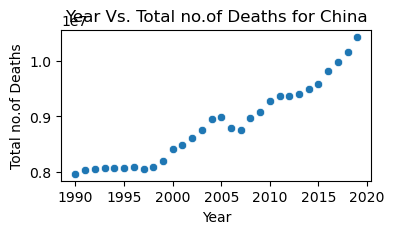

In [360]:
# China - "Total_no_of_Deaths" against "Year"

plt.figure(figsize=(4,2),dpi=100)
sns.scatterplot(data=China_Total_no_of_Deaths_data, x='Year', y='Total_no_of_Deaths')
plt.xlabel("Year")
plt.ylabel("Total no.of Deaths")
plt.title("Year Vs. Total no.of Deaths for China")
plt.show();

in top 50 china is top deaths in 1990 to 2020

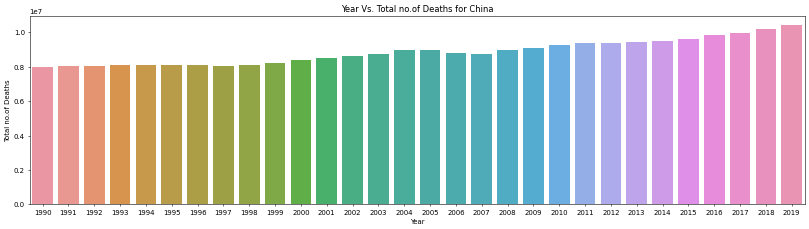

In [361]:
plt.figure(figsize=(20,5),dpi=50)
sns.barplot(data=China_Total_no_of_Deaths_data, x='Year', y='Total_no_of_Deaths')
plt.xlabel("Year")
plt.ylabel("Total no.of Deaths")
plt.title("Year Vs. Total no.of Deaths for China")
plt.show();

There is a clear raise in Total No.of Deaths recorded with each year for China

Common Causes of Death

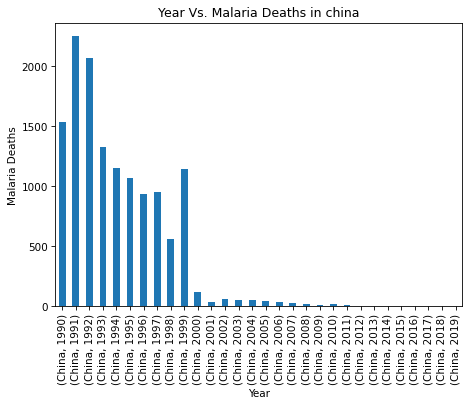

In [412]:
plt.figure(figsize=(7,5),dpi=75)
china_df = China_Total_no_of_Deaths_data.groupby(['Country/Territory','Year']).sum()
china_df['Malaria'].plot(kind='bar')
plt.xlabel("Year")
plt.ylabel("Malaria Deaths")
plt.title("Year Vs. Malaria Deaths in china")
plt.show();

There is a rapid drop in Malaria Deaths recorded in China after 1999.

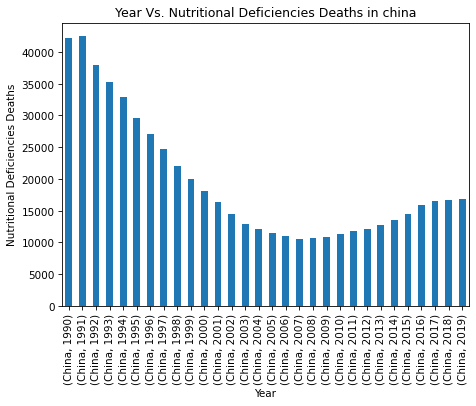

In [413]:
plt.figure(figsize=(7,5),dpi=75)
china_df = China_Total_no_of_Deaths_data.groupby(['Country/Territory','Year']).sum()
china_df['Nutritional Deficiencies'].plot(kind='bar')
plt.xlabel("Year")
plt.ylabel("Nutritional Deficiencies Deaths")
plt.title("Year Vs. Nutritional Deficiencies Deaths in china")
plt.show();

There is a drop in Nutritional Deficiencies Deaths recorded in China in 2007 and from 2008 the count of deaths again started to raise.

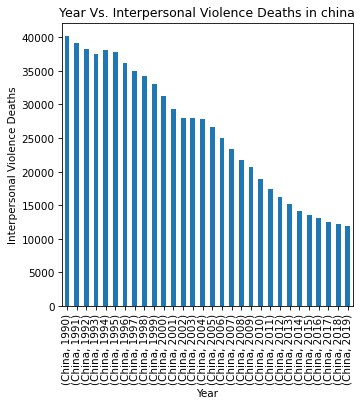

In [364]:
plt.figure(figsize=(5,5),dpi=75)
china_df = China_Total_no_of_Deaths_data.groupby(['Country/Territory','Year']).sum()
china_df['Interpersonal Violence'].plot(kind='bar')
plt.xlabel("Year")
plt.ylabel("Interpersonal Violence Deaths")
plt.title("Year Vs. Interpersonal Violence Deaths in china")
plt.show();

There is a continual drop in Interpersonal Violence Deaths recorded in China.

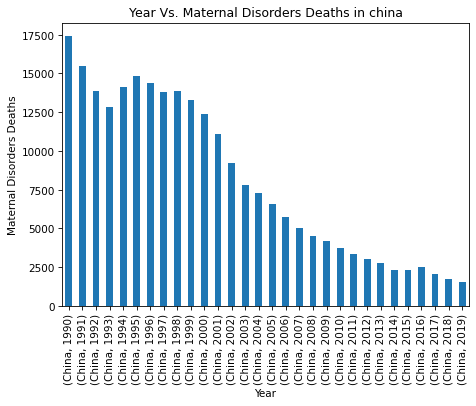

In [365]:
plt.figure(figsize=(7,5),dpi=75)
china_df = China_Total_no_of_Deaths_data.groupby(['Country/Territory','Year']).sum()
china_df['Maternal Disorders'].plot(kind='bar')
plt.xlabel("Year")
plt.ylabel("Maternal Disorders Deaths")
plt.title("Year Vs. Maternal Disorders Deaths in china")
plt.show();

There is a continual drop in Maternal Disorder Deaths recorded in China after year 1998.

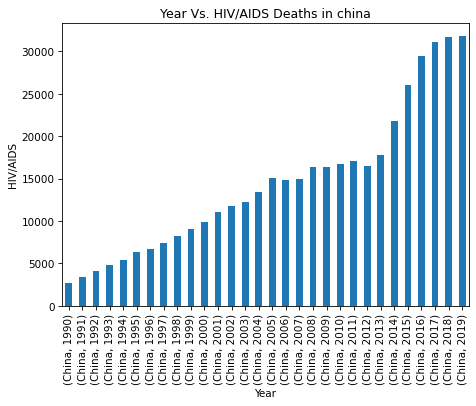

In [366]:
plt.figure(figsize=(7,5),dpi=75)
china_df = China_Total_no_of_Deaths_data.groupby(['Country/Territory','Year']).sum()
china_df['HIV/AIDS'].plot(kind='bar')
plt.xlabel("Year")
plt.ylabel("HIV/AIDS")
plt.title("Year Vs. HIV/AIDS Deaths in china")
plt.show();

There is a continual increase in HIV/AIDS Deaths recorded in China.

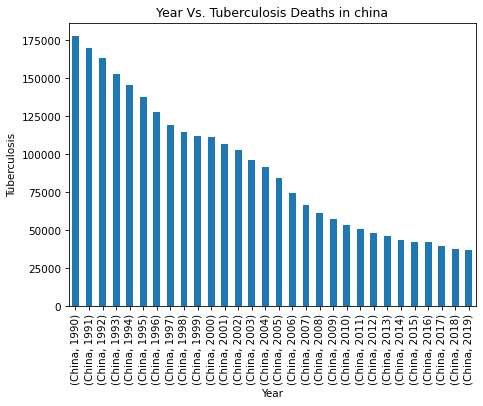

In [367]:
plt.figure(figsize=(7,5),dpi=75)
china_df = China_Total_no_of_Deaths_data.groupby(['Country/Territory','Year']).sum()
china_df['Tuberculosis'].plot(kind='bar')
plt.xlabel("Year")
plt.ylabel("Tuberculosis")
plt.title("Year Vs. Tuberculosis Deaths in china")
plt.show();

There is a continual decrease in Tuberculosis Deaths recorded in China.

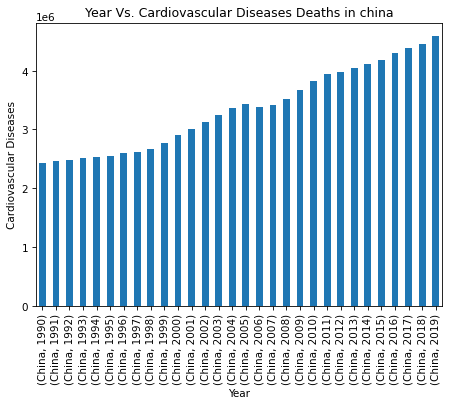

In [368]:
plt.figure(figsize=(7,5),dpi=75)
china_df = China_Total_no_of_Deaths_data.groupby(['Country/Territory','Year']).sum()
china_df['Cardiovascular Diseases'].plot(kind='bar')
plt.xlabel("Year")
plt.ylabel("Cardiovascular Diseases")
plt.title("Year Vs. Cardiovascular Diseases Deaths in china")
plt.show();

There is a continual increase in Cardiovascular Diseases Deaths recorded in China.

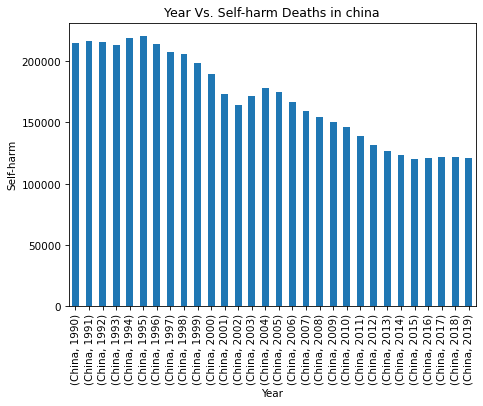

In [369]:
plt.figure(figsize=(7,5),dpi=75)
china_df = China_Total_no_of_Deaths_data.groupby(['Country/Territory','Year']).sum()
china_df['Self-harm'].plot(kind='bar')
plt.xlabel("Year")
plt.ylabel("Self-harm")
plt.title("Year Vs. Self-harm Deaths in china")
plt.show();

There is a continual drop in Self-harm Deaths recorded in China after year 2004.

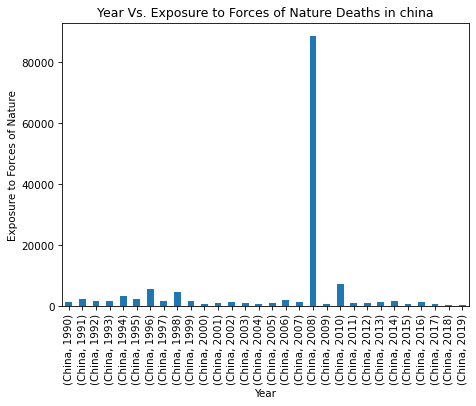

In [370]:
plt.figure(figsize=(7,5),dpi=75)
china_df = China_Total_no_of_Deaths_data.groupby(['Country/Territory','Year']).sum()
china_df['Exposure to Forces of Nature'].plot(kind='bar')
plt.xlabel("Year")
plt.ylabel("Exposure to Forces of Nature")
plt.title("Year Vs. Exposure to Forces of Nature Deaths in china")
plt.show();

There is a rapid raise in Exposure to Forces of Nature Deaths recorded in China in the year 2004 this is because of Sichuan earthquake of 2008

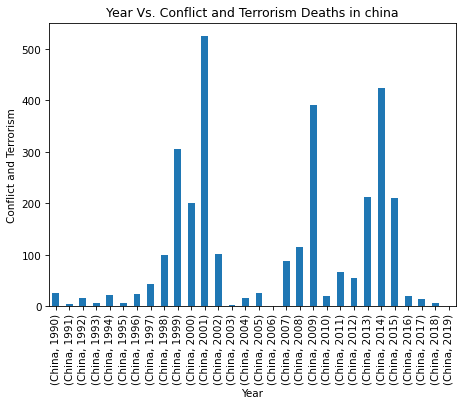

In [371]:
plt.figure(figsize=(7,5),dpi=75)
china_df = China_Total_no_of_Deaths_data.groupby(['Country/Territory','Year']).sum()
china_df['Conflict and Terrorism'].plot(kind='bar')
plt.xlabel("Year")
plt.ylabel("Conflict and Terrorism")
plt.title("Year Vs. Conflict and Terrorism Deaths in china")
plt.show();

The terrorist attack of 2014 is at Kunming Railway Station in Kunming, Yunnan, China on March 1st

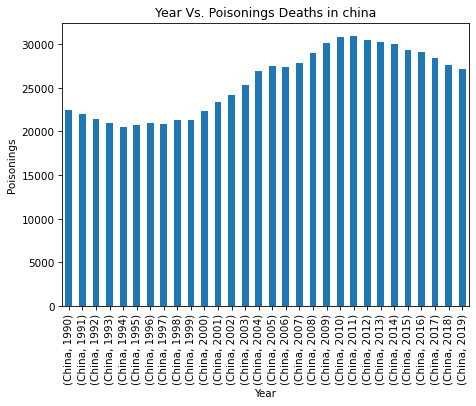

In [372]:
plt.figure(figsize=(7,5),dpi=75)
china_df = China_Total_no_of_Deaths_data.groupby(['Country/Territory','Year']).sum()
china_df['Poisonings'].plot(kind='bar')
plt.xlabel("Year")
plt.ylabel("Poisonings")
plt.title("Year Vs. Poisonings Deaths in china")
plt.show();

There is a continual raise in Poisonings Deaths recorded in China after year 1994.

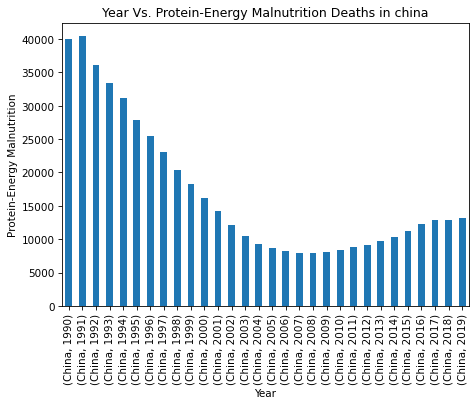

In [373]:
plt.figure(figsize=(7,5),dpi=75)
china_df = China_Total_no_of_Deaths_data.groupby(['Country/Territory','Year']).sum()
china_df['Protein-Energy Malnutrition'].plot(kind='bar')
plt.xlabel("Year")
plt.ylabel("Protein-Energy Malnutrition")
plt.title("Year Vs. Protein-Energy Malnutrition Deaths in china")
plt.show();

There is a continual raise in Protein-Energy Malnutrition Deaths recorded in China after year 2007.

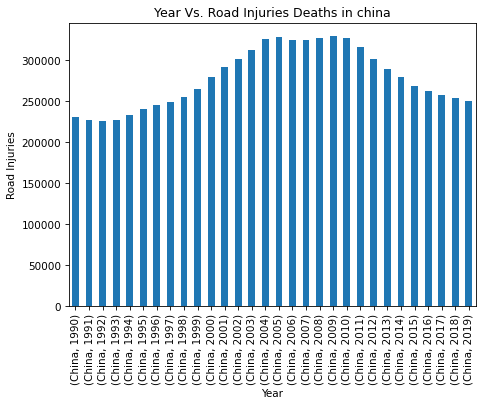

In [374]:
plt.figure(figsize=(7,5),dpi=75)
china_df = China_Total_no_of_Deaths_data.groupby(['Country/Territory','Year']).sum()
china_df['Road Injuries'].plot(kind='bar')
plt.xlabel("Year")
plt.ylabel("Road Injuries")
plt.title("Year Vs. Road Injuries Deaths in china")
plt.show()

There is a continual drop in Road Injuries Deaths recorded in China after year 2009.

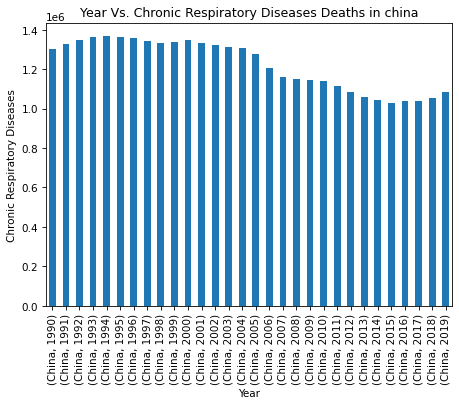

In [375]:
plt.figure(figsize=(7,5),dpi=75)
china_df = China_Total_no_of_Deaths_data.groupby(['Country/Territory','Year']).sum()
china_df['Chronic Respiratory Diseases'].plot(kind='bar')
plt.xlabel("Year")
plt.ylabel("Chronic Respiratory Diseases")
plt.title("Year Vs. Chronic Respiratory Diseases Deaths in china")
plt.show();

There is a continual drop in Chronic Respiratory Diseases Deaths recorded in China after year 2004.

# India Data Visualization

In [376]:
# India - "Total_no_of_Deaths" against "Year"

India_Total_no_of_Deaths_data = data[data['Country/Territory']=='India'].sort_values(by='Total_no_of_Deaths',ascending=False)

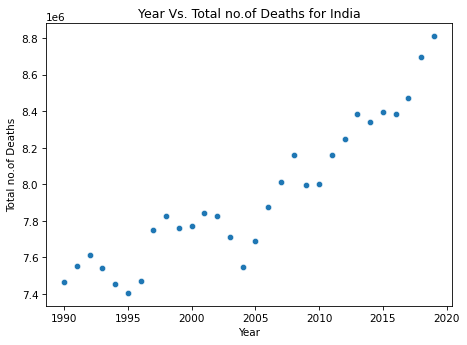

In [377]:
# India - "Total_no_of_Deaths" against "Year"

plt.figure(figsize=(7,5),dpi=75)
sns.scatterplot(data=India_Total_no_of_Deaths_data, x='Year', y='Total_no_of_Deaths')
plt.xlabel("Year")
plt.ylabel("Total no.of Deaths")
plt.title("Year Vs. Total no.of Deaths for India")
plt.show();

in india also no. of death increase..

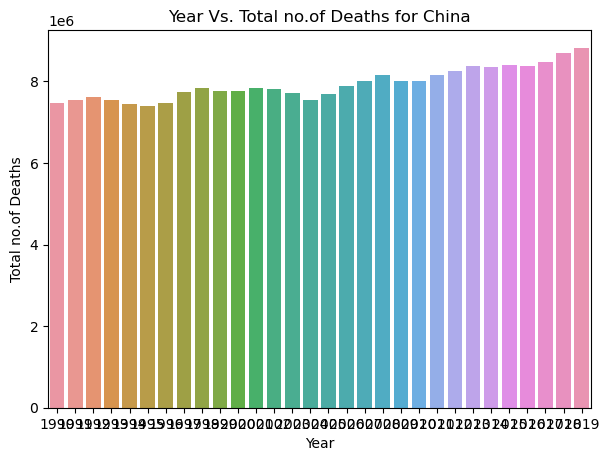

In [378]:
plt.figure(figsize=(7,5),dpi=100)
sns.barplot(data=India_Total_no_of_Deaths_data, x='Year', y='Total_no_of_Deaths')
plt.xlabel("Year")
plt.ylabel("Total no.of Deaths")
plt.title("Year Vs. Total no.of Deaths for China")
plt.show();

Overall there is a raise in Total No.of Deaths recorded with each year for India, even though there are fluctuations inbetween.

Common Causes of Death

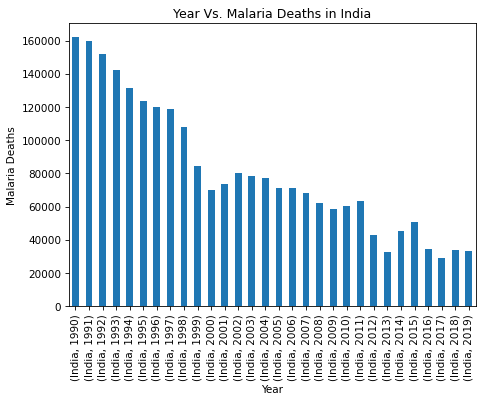

In [379]:
plt.figure(figsize=(7,5),dpi=75)
china_df = India_Total_no_of_Deaths_data.groupby(['Country/Territory','Year']).sum()
china_df['Malaria'].plot(kind='bar')
plt.xlabel("Year")
plt.ylabel("Malaria Deaths")
plt.title("Year Vs. Malaria Deaths in India")
plt.show()

There is a rapid drop in Malaria Deaths recorded in India from 1990, but the Deaths in 2018 and 2019 is greater than that of 2016 and 2017.

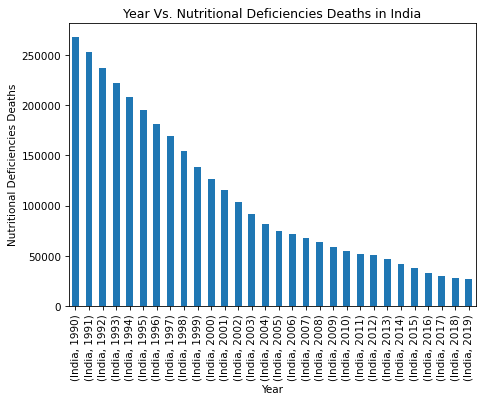

In [380]:
plt.figure(figsize=(7,5),dpi=75)
china_df = India_Total_no_of_Deaths_data.groupby(['Country/Territory','Year']).sum()
china_df['Nutritional Deficiencies'].plot(kind='bar')
plt.xlabel("Year")
plt.ylabel("Nutritional Deficiencies Deaths")
plt.title("Year Vs. Nutritional Deficiencies Deaths in India")
plt.show();

There is a continual drop in Nutritional Deficiencies Deaths recorded in India from 1990.

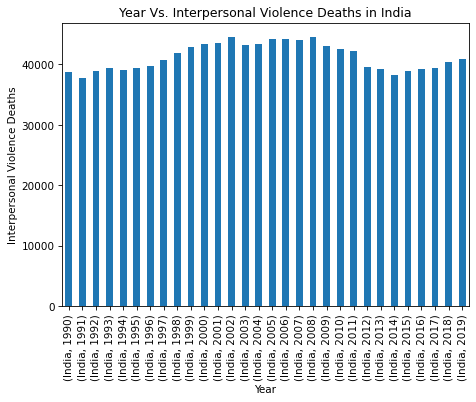

In [381]:
plt.figure(figsize=(7,5),dpi=75)
china_df = India_Total_no_of_Deaths_data.groupby(['Country/Territory','Year']).sum()
china_df['Interpersonal Violence'].plot(kind='bar')
plt.xlabel("Year")
plt.ylabel("Interpersonal Violence Deaths")
plt.title("Year Vs. Interpersonal Violence Deaths in India")
plt.show();

There is a raise in Interpersonal Violence Deaths recorded in India from 2014

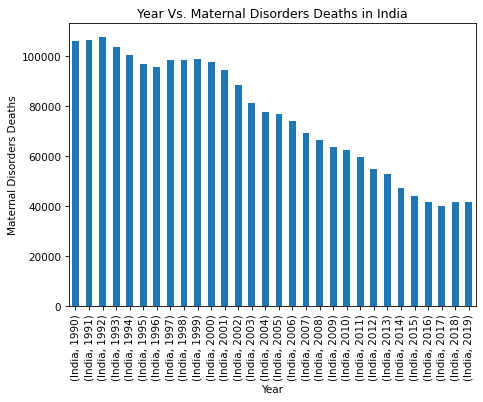

In [382]:
plt.figure(figsize=(7,5),dpi=75)
china_df = India_Total_no_of_Deaths_data.groupby(['Country/Territory','Year']).sum()
china_df['Maternal Disorders'].plot(kind='bar')
plt.xlabel("Year")
plt.ylabel("Maternal Disorders Deaths")
plt.title("Year Vs. Maternal Disorders Deaths in India")
plt.show();

There is continual drop in Maternal Disorders Deaths recorded in India after 1999.

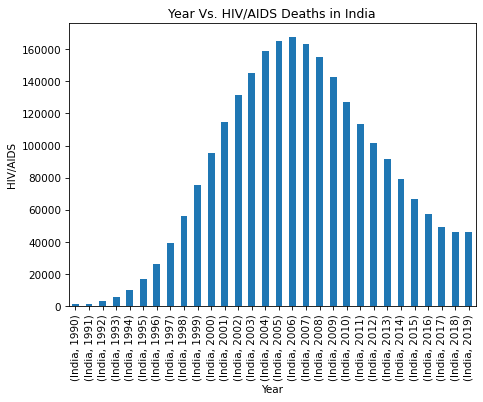

In [383]:
plt.figure(figsize=(7,5),dpi=75)
china_df = India_Total_no_of_Deaths_data.groupby(['Country/Territory','Year']).sum()
china_df['HIV/AIDS'].plot(kind='bar')
plt.xlabel("Year")
plt.ylabel("HIV/AIDS")
plt.title("Year Vs. HIV/AIDS Deaths in India")
plt.show();

There is continual raise in HIV/AIDS Deaths recorded in India from 1992 and reached peak at 2006 from where there is continual drop.

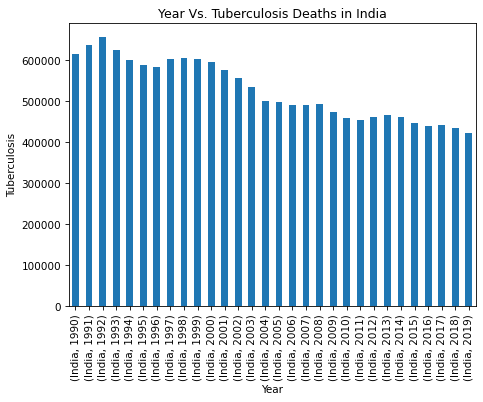

In [384]:
plt.figure(figsize=(7,5),dpi=75)
china_df = India_Total_no_of_Deaths_data.groupby(['Country/Territory','Year']).sum()
china_df['Tuberculosis'].plot(kind='bar')
plt.xlabel("Year")
plt.ylabel("Tuberculosis")
plt.title("Year Vs. Tuberculosis Deaths in India")
plt.show();

Though there are deviations in Tuberculosis Deaths recorded in India, there is a drop after year 1998.

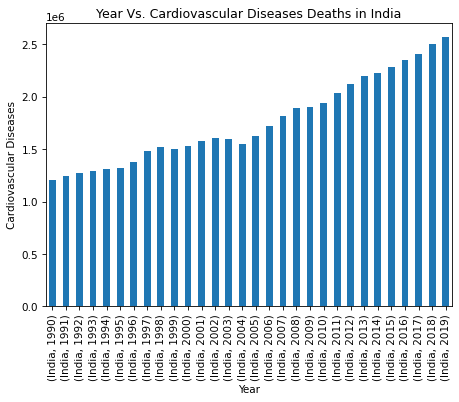

In [385]:
plt.figure(figsize=(7,5),dpi=75)
china_df = India_Total_no_of_Deaths_data.groupby(['Country/Territory','Year']).sum()
china_df['Cardiovascular Diseases'].plot(kind='bar')
plt.xlabel("Year")
plt.ylabel("Cardiovascular Diseases")
plt.title("Year Vs. Cardiovascular Diseases Deaths in India")
plt.show();

There are continual raise in Cardiovascular Diseases Deaths recorded in India.

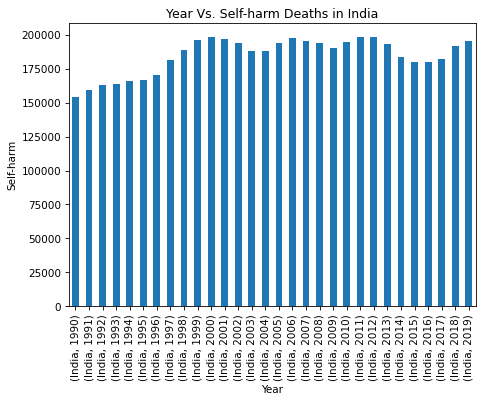

In [386]:
plt.figure(figsize=(7,5),dpi=75)
china_df = India_Total_no_of_Deaths_data.groupby(['Country/Territory','Year']).sum()
china_df['Self-harm'].plot(kind='bar')
plt.xlabel("Year")
plt.ylabel("Self-harm")
plt.title("Year Vs. Self-harm Deaths in India")
plt.show();

There are continual raise in Self-harm Deaths recorded in India from 1990 to 2001, but then there are fluctuations.

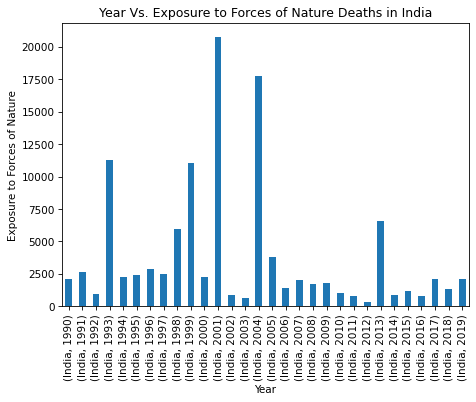

In [387]:
plt.figure(figsize=(7,5),dpi=75)
china_df = India_Total_no_of_Deaths_data.groupby(['Country/Territory','Year']).sum()
china_df['Exposure to Forces of Nature'].plot(kind='bar')
plt.xlabel("Year")
plt.ylabel("Exposure to Forces of Nature")
plt.title("Year Vs. Exposure to Forces of Nature Deaths in India")
plt.show();

Bhachau Taluka of Kutch (Gujarat) experienced an earthquake of 7.6 to 7.9 on the Richter Scale and lasted for 120 seconds. This disaster killed around 20,000, injured 167,000 and nearly 400,000 people became homeless.The 2013 incident: The year 2013 witnessed two major events, the Uttarakhand Flash Floods, mainly affecting the state of Uttarakhand and the Cyclone “Phailin” affecting two coastal states of Odisha and Andhra Prades

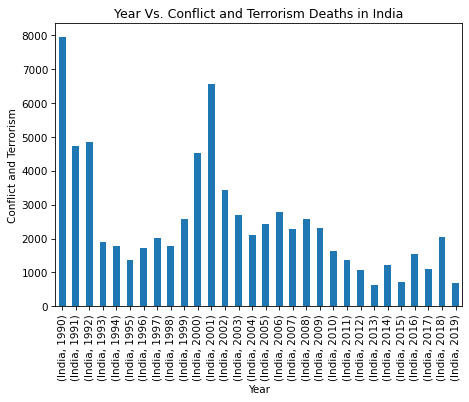

In [388]:
plt.figure(figsize=(7,5),dpi=75)
china_df = India_Total_no_of_Deaths_data.groupby(['Country/Territory','Year']).sum()
china_df['Conflict and Terrorism'].plot(kind='bar')
plt.xlabel("Year")
plt.ylabel("Conflict and Terrorism")
plt.title("Year Vs. Conflict and Terrorism Deaths in India")
plt.show();

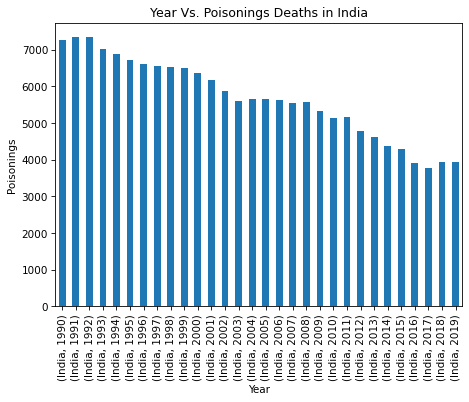

In [389]:
plt.figure(figsize=(7,5),dpi=75)
china_df = India_Total_no_of_Deaths_data.groupby(['Country/Territory','Year']).sum()
china_df['Poisonings'].plot(kind='bar')
plt.xlabel("Year")
plt.ylabel("Poisonings")
plt.title("Year Vs. Poisonings Deaths in India")
plt.show();

Overall there is a gradual decrease in the Poisonings Deaths recorded in India.

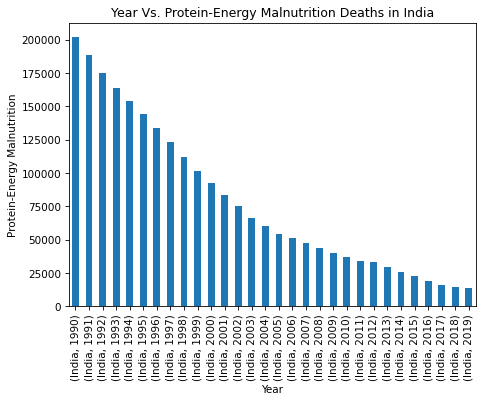

In [390]:
plt.figure(figsize=(7,5),dpi=75)
china_df = India_Total_no_of_Deaths_data.groupby(['Country/Territory','Year']).sum()
china_df['Protein-Energy Malnutrition'].plot(kind='bar')
plt.xlabel("Year")
plt.ylabel("Protein-Energy Malnutrition")
plt.title("Year Vs. Protein-Energy Malnutrition Deaths in India")
plt.show();

There is a continual drop in the Protein-Energy Malnutrition Deaths recorded in India.

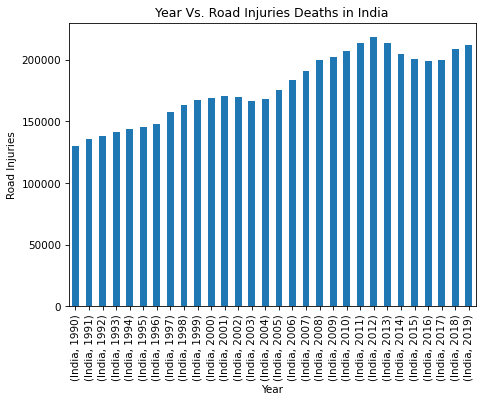

In [391]:
plt.figure(figsize=(7,5),dpi=75)
china_df = India_Total_no_of_Deaths_data.groupby(['Country/Territory','Year']).sum()
china_df['Road Injuries'].plot(kind='bar')
plt.xlabel("Year")
plt.ylabel("Road Injuries")
plt.title("Year Vs. Road Injuries Deaths in India")
plt.show();

There is a continual raise in the Road Injuries Deaths recorded in India with fluctuations between 2013 to 2017.

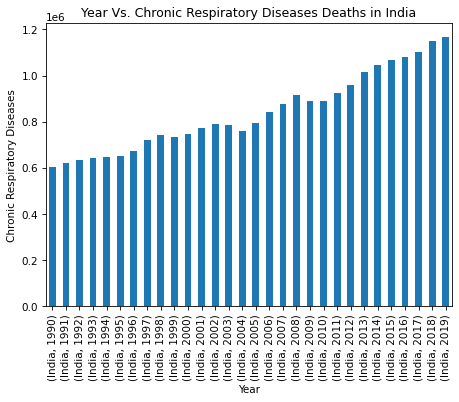

In [392]:
plt.figure(figsize=(7,5),dpi=75)
china_df = India_Total_no_of_Deaths_data.groupby(['Country/Territory','Year']).sum()
china_df['Chronic Respiratory Diseases'].plot(kind='bar')
plt.xlabel("Year")
plt.ylabel("Chronic Respiratory Diseases")
plt.title("Year Vs. Chronic Respiratory Diseases Deaths in India")
plt.show();

There is a continual raise in the Chronic Respiratory Diseases Deaths recorded in India with mere fluctuations inbetween.

# Top 3 Countries interms of "Total no.of Deaths" - For All the Years

In [393]:
# Total causes of death across 20 years

Countries_Total_no_of_Deaths_noyear_data = data.groupby('Country/Territory').sum()
Countries_Total_no_of_Deaths_noyear_data.drop('Year',axis=1,inplace=True)

In [394]:
# Top 3 Countries interms of "Total no.of Deaths" - For All the Years

Countries_Total_no_of_Deaths_noyear_data.sort_values(by='Total_no_of_Deaths',ascending =False)[:3]

,Meningitis,Alzheimer's Disease and Other Dementias,Parkinson's Disease,Nutritional Deficiencies,Malaria,Drowning,Interpersonal Violence,Maternal Disorders,HIV/AIDS,Drug Use Disorders,...,Chronic Kidney Disease,Poisonings,Protein-Energy Malnutrition,Road Injuries,Chronic Respiratory Diseases,Cirrhosis and Other Chronic Liver Diseases,Digestive Diseases,"Fire, Heat, and Hot Substances",Acute Hepatitis,Total_no_of_Deaths
Country/Territory,,,,,,,,,,,,,,,,,,,,,
China,480899,5381846,1533092,584236,13418,2873619,776275,243257,433709,626914,...,4195276,770140,507664,8350399,36676826,4918899,8924906,383402,318564,265408106
India,2008944,1707561,756832,3290569,2439244,2110438,1237163,2292449,2454374,168928,...,4556172,170119,2356222,5346154,25232974,6294910,11804380,730580,1672179,238158165
United States,40032,3302609,661288,133044,0,114752,596818,25206,528417,800798,...,2018497,40259,121030,1359744,4949052,1514325,3026943,126712,5851,71197802


# China - Top 10 Causes of Deaths

In [395]:
china_10 = Countries_Total_no_of_Deaths_noyear_data.sort_values(by='Total_no_of_Deaths',ascending =False)[:1]

In [396]:
china_10.iloc[0].sort_values(ascending=False)[1:11]

Cardiovascular Diseases                       100505973
Neoplasms                                      61060527
Chronic Respiratory Diseases                   36676826
Digestive Diseases                              8924906
Lower Respiratory Infections                    8525819
Road Injuries                                   8350399
Alzheimer's Disease and Other Dementias         5381846
Self-harm                                       5078550
Cirrhosis and Other Chronic Liver Diseases      4918899
Neonatal Disorders                              4353666
Name: China, dtype: int64

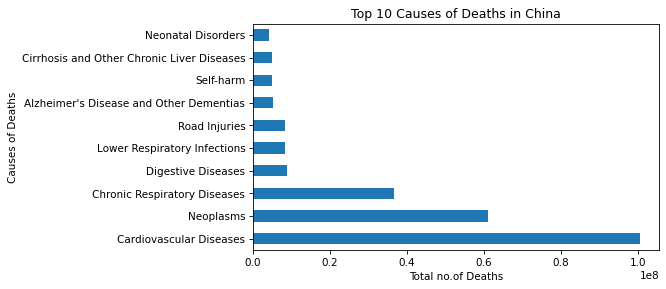

In [397]:
plt.figure(figsize=(7,4),dpi=75)
china_10.iloc[0].sort_values(ascending=False)[1:11].plot(kind='barh')
plt.xlabel("Total no.of Deaths")
plt.ylabel("Causes of Deaths")
plt.title("Top 10 Causes of Deaths in China")
plt.show();

India - Top 10 Causes of Deaths

In [398]:
India_10 = Countries_Total_no_of_Deaths_noyear_data.sort_values(by='Total_no_of_Deaths',ascending =False)[1:2]

In [399]:
India_10.iloc[0].sort_values(ascending=False)[1:11]

Cardiovascular Diseases                       52994710
Diarrheal Diseases                            26243547
Chronic Respiratory Diseases                  25232974
Neonatal Disorders                            20911570
Neoplasms                                     17762703
Lower Respiratory Infections                  16419404
Tuberculosis                                  15820922
Digestive Diseases                            11804380
Cirrhosis and Other Chronic Liver Diseases     6294910
Self-harm                                      5543395
Name: India, dtype: int64

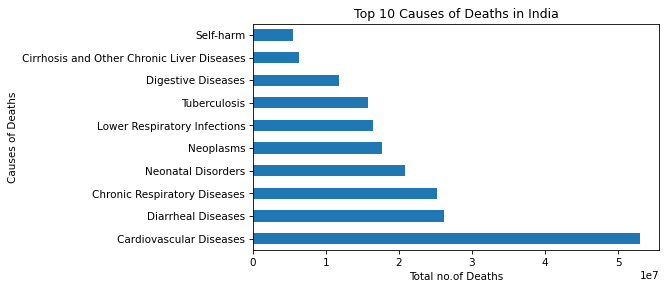

In [400]:
plt.figure(figsize=(7,4),dpi=75)
India_10.iloc[0].sort_values(ascending=False)[1:11].plot(kind='barh')
plt.xlabel("Total no.of Deaths")
plt.ylabel("Causes of Deaths")
plt.title("Top 10 Causes of Deaths in India")
plt.show();

United States - Top 10 Causes of Deaths

In [401]:
usa_10 = Countries_Total_no_of_Deaths_noyear_data.sort_values(by='Total_no_of_Deaths',ascending =False)[2:3]

In [402]:
usa_10.iloc[0].sort_values(ascending=False)[1:11]

Cardiovascular Diseases                       26438346
Neoplasms                                     18905315
Chronic Respiratory Diseases                   4949052
Alzheimer's Disease and Other Dementias        3302609
Digestive Diseases                             3026943
Lower Respiratory Infections                   2248625
Diabetes Mellitus                              2030631
Chronic Kidney Disease                         2018497
Cirrhosis and Other Chronic Liver Diseases     1514325
Road Injuries                                  1359744
Name: United States, dtype: int64

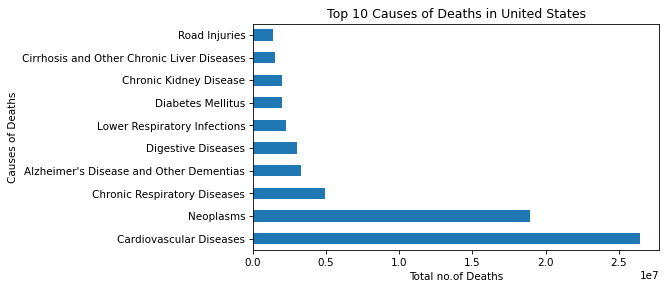

In [403]:
plt.figure(figsize=(7,4),dpi=75)
usa_10.iloc[0].sort_values(ascending=False)[1:11].plot(kind='barh')
plt.xlabel("Total no.of Deaths")
plt.ylabel("Causes of Deaths")
plt.title("Top 10 Causes of Deaths in United States")
plt.show()

# Major causes of death

In [404]:
def countCols(data):
    result = len(data.axes[1])
    return result

def countRows(data):
    result = len(data.axes[0])
    return result

num_cols = countCols(data)
num_rows = countRows(data)

In [405]:
names_cause = pd.Series(data.columns.values[3:])
names_cause

0                                     Meningitis
1        Alzheimer's Disease and Other Dementias
2                            Parkinson's Disease
3                       Nutritional Deficiencies
4                                        Malaria
5                                       Drowning
6                         Interpersonal Violence
7                             Maternal Disorders
8                                       HIV/AIDS
9                             Drug Use Disorders
10                                  Tuberculosis
11                       Cardiovascular Diseases
12                  Lower Respiratory Infections
13                            Neonatal Disorders
14                         Alcohol Use Disorders
15                                     Self-harm
16                  Exposure to Forces of Nature
17                            Diarrheal Diseases
18          Environmental Heat and Cold Exposure
19                                     Neoplasms
20                  

In [406]:

def getMin(arr):
    return arr.min()
    
    
def getMax(arr):
    return arr.max()

cause_death_profile = {}

for name_cause in names_cause:
    cause_Series = data[name_cause]
    cause_num_min = getMin(cause_Series)
    cause_num_max = getMax(cause_Series)
    cause_death_profile[name_cause] = [cause_num_min,cause_num_max]
    
cause_death_profile

{'Meningitis': [0, 98358],
 "Alzheimer's Disease and Other Dementias": [0, 320715],
 "Parkinson's Disease": [0, 76990],
 'Nutritional Deficiencies': [0, 268223],
 'Malaria': [0, 280604],
 'Drowning': [0, 153773],
 'Interpersonal Violence': [0, 69640],
 'Maternal Disorders': [0, 107929],
 'HIV/AIDS': [0, 305491],
 'Drug Use Disorders': [0, 65717],
 'Tuberculosis': [0, 657515],
 'Cardiovascular Diseases': [4, 4584273],
 'Lower Respiratory Infections': [0, 690913],
 'Neonatal Disorders': [0, 852761],
 'Alcohol Use Disorders': [0, 55200],
 'Self-harm': [0, 220357],
 'Exposure to Forces of Nature': [0, 222641],
 'Diarrheal Diseases': [0, 1119477],
 'Environmental Heat and Cold Exposure': [0, 29048],
 'Neoplasms': [1, 2716551],
 'Conflict and Terrorism': [0, 503532],
 'Diabetes Mellitus': [1, 273089],
 'Chronic Kidney Disease': [0, 222922],
 'Poisonings': [0, 30883],
 'Protein-Energy Malnutrition': [0, 202241],
 'Road Injuries': [0, 329237],
 'Chronic Respiratory Diseases': [1, 1366039],
 'C

In [407]:
# plot top 10 illnesses in any country in all years
def top_10_illnesses(country):
    data_country = data[data['Country/Territory'] == country]
    min_year, max_year = data_country['Year'].min(), data_country['Year'].max()
    fig = px.bar(data_country.iloc[:, 3:].sum().sort_values(ascending=False).head(10), title='Top 10 Cause of Deaths in {} between {} and {}'.format(country, min_year, max_year), color_discrete_sequence=px.colors.qualitative.Pastel, labels={'value': 'Amount of deaths', 'index': 'Cause of Deaths'})
    fig.update_layout(showlegend=False)
    fig.show()

In [408]:
top_10_illnesses('Mexico')
top_10_illnesses('United States')
top_10_illnesses('Canada')
top_10_illnesses('India')
top_10_illnesses('China')
top_10_illnesses('United Kingdom')


In [409]:
# plot top 10 illnesses in coountry in a specific year
def top_10_illnesses_year(country, year):
    data_country = data[data['Country/Territory'] == country]
    data_country_year = data_country[data_country['Year'] == year]
    fig = px.bar(data_country_year.iloc[:, 2:].sum().sort_values(ascending=False).head(10), title='Top 10 Cause of Deaths in {} in {}'.format(country, year), color_discrete_sequence=px.colors.qualitative.Pastel, labels={'value': 'Amount of deaths', 'index': 'Cause of Deaths'})
    fig.update_layout(showlegend=False)
    fig.show()

In [410]:
top_10_illnesses_year('Mexico', 2019)
top_10_illnesses_year('United States', 2019)
top_10_illnesses_year('Canada', 2019)
top_10_illnesses_year('India', 2019)
top_10_illnesses_year('China', 2019)
top_10_illnesses_year('United Kingdom', 2019)

# Conclusion: of data set

# this is my conclusion of this dataset to need to decease the death of major resion of death in world and do the useful things to decrease diseases resion of death


#        
BY-NANDINI SINGH 
